In [129]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [130]:
data = fetch_california_housing()

X = data.data[:,[0]]
y = data.target.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Normalize
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [131]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    plt.legend(prop={"size":14})

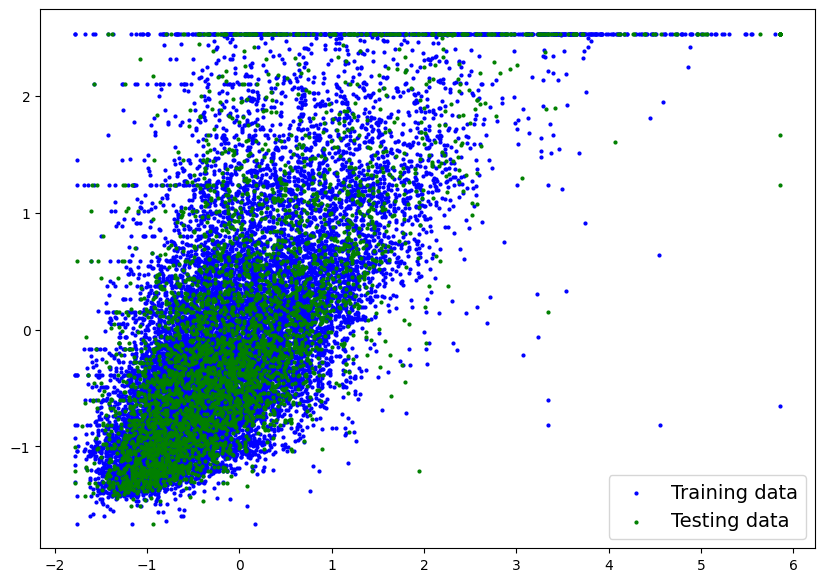

In [132]:
plot_predictions()

In [133]:
class HousePricePredictorV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer = nn.Linear(in_features=1,
                               out_features=1)
        
    def forward(self, x):
        return self.layer(x)

In [134]:
model_0 = HousePricePredictorV0()
model_0.state_dict()

OrderedDict([('layer.weight', tensor([[0.7775]])),
             ('layer.bias', tensor([0.1257]))])

In [135]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01)


In [136]:
epochs = 300

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        y_test_pred = model_0(X_test)

        test_loss = loss_fn(y_test_pred, y_test)
    
    if epoch % 30 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f} ")


Epoch: 0 | Loss: 0.57294 | Test loss: 0.57398 
Epoch: 30 | Loss: 0.55011 | Test loss: 0.55047 
Epoch: 60 | Loss: 0.53847 | Test loss: 0.53809 
Epoch: 90 | Loss: 0.53280 | Test loss: 0.53223 
Epoch: 120 | Loss: 0.53008 | Test loss: 0.52931 
Epoch: 150 | Loss: 0.52869 | Test loss: 0.52769 
Epoch: 180 | Loss: 0.52802 | Test loss: 0.52687 
Epoch: 210 | Loss: 0.52773 | Test loss: 0.52649 
Epoch: 240 | Loss: 0.52758 | Test loss: 0.52631 
Epoch: 270 | Loss: 0.52751 | Test loss: 0.52622 


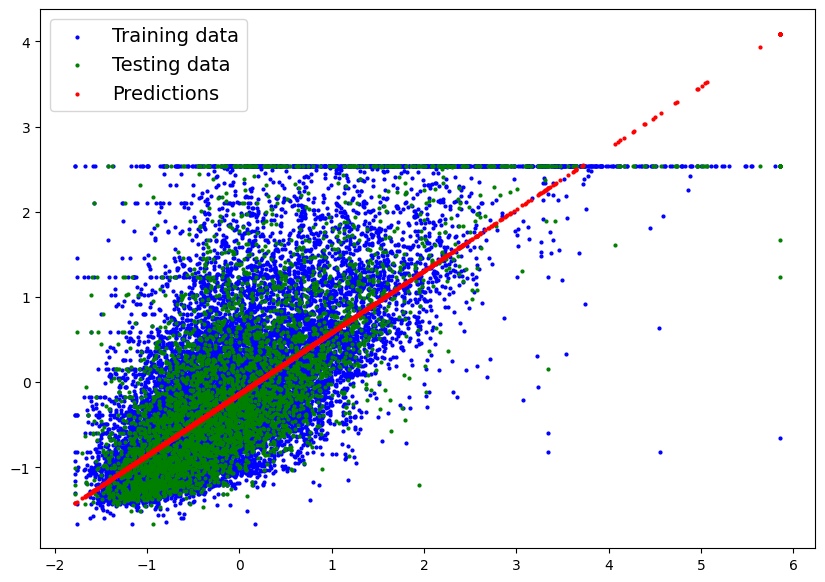

In [137]:
with torch.inference_mode():
    y_pred = model_0(X_test)

plot_predictions(predictions=y_pred)

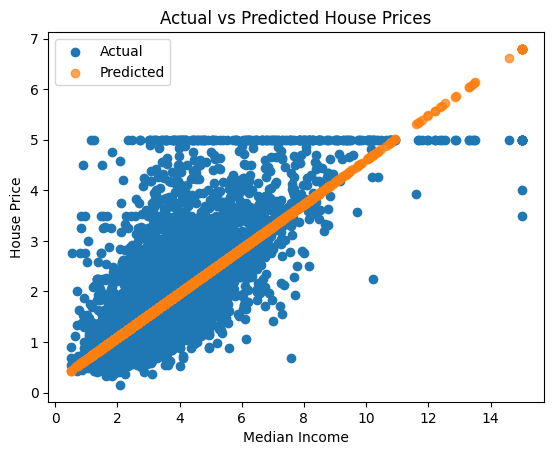

In [138]:
import matplotlib.pyplot as plt

# Inverse transform to original scale
y_pred_real = scaler_y.inverse_transform(y_pred.numpy())
y_test_real = scaler_y.inverse_transform(y_test.numpy())

plt.scatter(scaler_x.inverse_transform(X_test.numpy()), y_test_real, label="Actual")
plt.scatter(scaler_x.inverse_transform(X_test.numpy()), y_pred_real, label="Predicted", alpha=0.7)
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend()
plt.title("Actual vs Predicted House Prices")
plt.show()


In [139]:
class HousePricePredictorV1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer = nn.Sequential(
            nn.Linear(in_features=1,
                      out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,
                      out_features=1)
        )
        
    def forward(self, x):
        return self.layer(x)

In [140]:
model_1 = HousePricePredictorV1()

In [141]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [142]:
epochs = 300

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        y_test_pred = model_1(X_test)

        test_loss = loss_fn(y_test_pred, y_test)
    
    if epoch % 30 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.95794 | Test loss: 0.93023
Epoch: 30 | Loss: 0.76579 | Test loss: 0.75069
Epoch: 60 | Loss: 0.67430 | Test loss: 0.66528
Epoch: 90 | Loss: 0.62748 | Test loss: 0.62185
Epoch: 120 | Loss: 0.60106 | Test loss: 0.59712
Epoch: 150 | Loss: 0.58364 | Test loss: 0.58051
Epoch: 180 | Loss: 0.57073 | Test loss: 0.56792
Epoch: 210 | Loss: 0.56060 | Test loss: 0.55797
Epoch: 240 | Loss: 0.55257 | Test loss: 0.55001
Epoch: 270 | Loss: 0.54626 | Test loss: 0.54369


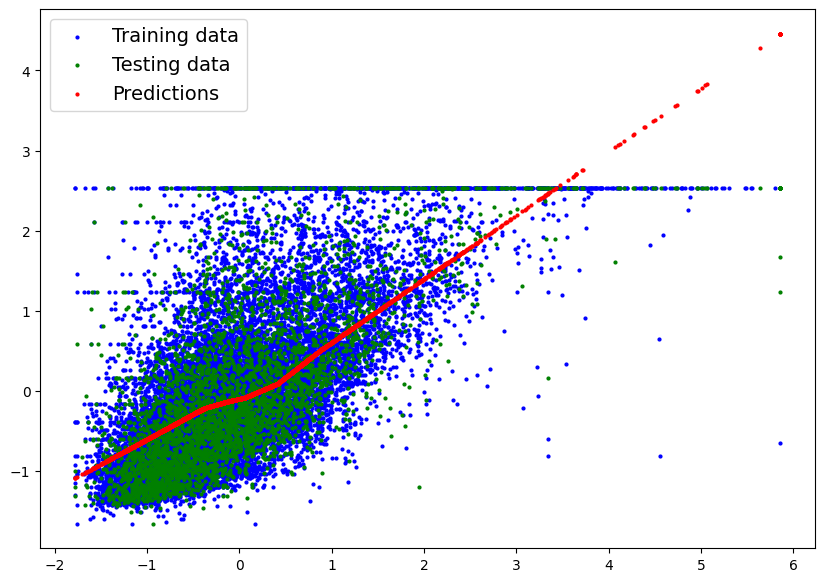

In [143]:
with torch.inference_mode():
    y_pred = model_1(X_test)

plot_predictions(predictions=y_pred)